<p style="text-align:center; font-size:2.5em; color:#984ed6; line-height:4rem; font-style:italic; font-weight:700;">
   Partie 2: Featuring </p>

<div class="alert alert-info">   <b> Nous avons des données avec plusieurs variables.Pour la construction d'un bon modèle prédictif, nous avons besoin de garder les variables les plus pertinentes.</b></div>  

# Sommaire

* [<font color="red">Contexte et Objectifs</font>](#chapter1) 
* [<font color="red">Gestion des variables caractéristiques</font>](#chapter2)
    * [<font color="blue">Importation des librairies et des données](#section_2_1)
        * [Importation des librairies](#section_2_1_1)
        * [Importation des données](#section_2_1_2)
        * [ Les fonctions](#section_2_1_3)
    * [<font color="blue">Traitement des variables catégorielles](#section_2_2)
        * [Sélection des variables catégorielles dépendantes](#section_2_2_1)
        * [Quantification des variables catégorielles](#section_2_2_2)
             * [Les variables catégorielles ordinales](#section_2_2_2_1)
             * [Les variables catégorielles nominales](#section_2_2_2_2)
    * [<font color="blue">Traitement des variables continues](#section_2_3)        
    * [<font color="blue">Création des ensembles X_Xtrain et X_valid](#section_2_4)           
* [<font color="red">Variable cible - Gestion du problème de classification déséquilibrée</font>](#chapter3)
    * [<font color="blue">Observations avant équilibrage de la cible](#section_3_1)    
        * [<font color="magenta">Visualisation de la "precision", du "recall" et du "f1-score"](#section_3_1_1)        
        * [<font color="magenta">Visualisation de "AUC" et de "ROC"](#section_3_1_2)
    * [<font color="blue">Équilibrage de la cible](#section_3_2)    
    * [<font color="blue">Observations après équilibrage de la cible](#section_3_3)    
        * [<font color="magenta">Visualisation de la "precision", du "recall" et du "f1-score"](#section_3_3_1)        
        * [<font color="magenta">Visualisation de "AUC" et de "ROC"](#section_3_3_2)    
* [<font color="red">Enregistrement des datasets</font>](#chapter4)

<div class="alert alert-info">
<h3>Les commentaires <font color="red">en fond bleu </font> indiquent <font color="red">une information
</div>

<div class="alert alert-success">
<h3>Les commentaires <font color="red">en fond vert </font> indiquent <font color="red">un résultat
</div>

<div class="alert alert-warning">
<h3>Les commentaires <font color="red">en fond jaune </font> indiquent <font color="red">une mise en garde
</div>

<div class="alert alert-danger">
<h3>Les commentaires <font color="red">en fond rouge </font> indiquent <font color="red">une information CAPITALE
</div>

<h1> <p><font color="blue">Contexte et Objectifs</font></p></h1><a class="anchor" id="chapter1"></a>

La société financière <font color="#fc1c14">*"Prêt à dépenser"*</font>  propose des crédits à la consommation pour des personnes ayant <font color="#fc1c14">*"peu ou pas du tout d'historique de prêt"*.</font>

1. <font color="#fc1c14">**Premier Objectif :**</font>
L’entreprise souhaite mettre en oeuvre un outil de *scoring crédit* qui calcule la **probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé**. Elle souhaite donc développer un **algorithme de classification** en s'appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutionsfinancières, etc.).

2. <font color="#fc1c14">**Second Objectif :**</font>
De plus, les chargés de relation client ont fait remonter le fait que les clients sont de plus en plus demandeurs de **transparence vis-à-vis des décisions d’octroi de crédit**. Cette demande de transparence des clients va tout à fait dans le sens des valeurs que l’entreprise veut incarner. *Prêt à dépenser* décide donc de **développer un dashboard interactif** pour que les chargés de relation client puissent à la fois expliquer de façon la plus transparente possible les décisions d’octroi de crédit, mais également **permettre à leurs clients de disposer de leurs informations personnelles et de les explorer facilement.**

***Spécifications du dashboard***
Il devra contenir au minimum les fonctionnalités suivantes :
  - Permettre de visualiser le score et l’interprétation de ce score pour chaque client de façon intelligible pour une personne non experte en data science.
  - Permettre de visualiser des informations descriptives relatives à un client (via un système de filtre).
  - Permettre de comparer les informations descriptives relatives à un client à l’ensemble des clients ou à un groupe de clients similaires.
  
  
3. Livrables
  - Le dashboard interactif répondant aux spécifications et l’API de prédiction du score, déployées chacunes sur le cloud.
  
  - Un dossier sur un outil de versioning de code contenant :
        - Le code de la modélisation (du prétraitement à la prédiction)
        - Le code générant le dashboard
        - Le code permettant de déployer le modèle sous forme d'API
        
  - Une note méthodologique décrivant :
        - La méthodologie d'entraînement du modèle 
        - La fonction coût métier, l'algorithme d'optimisation et la métrique d'évaluation 
        - L’interprétabilité globale et locale du modèle 
        - Les limites et les améliorations possibles 
        
  - Un support de présentation pour la soutenance, détaillant le travail réalisé.
  
  

`DAYS_CREDIT`: Quel est le nombre de jours entre la demande actuelle de crédit du client et sa demande précédente enregistrée au bureau de crédit.

`AMT_CREDIT_SUM` (Montant actuel du crédit enregistré au bureau de crédit)

`CREDIT_DAY_OVERDUE` (Nombre de jours d'impayés sur crédit CB au moment de la demande de prêt)

`CNT_CREDIT_PROLONG`(Combien de fois le crédit du bureau de crédit a-t-il été prolongé)

`AMT_CREDIT_SUM_OVERDUE` (Montant actuel en souffrance sur le crédit du bureau de crédit)

`SK_ID_BUREAU`  (nombre de crédit)
 
`CNT_INSTALMENT` : Durée du crédit précédent

`CNT_INSTALMENT_FUTURE` : Acomptes restant à payer sur le crédit précédent

`SK_DPD` : DPD (jours de retard) au cours du mois du crédit précédent

`SK_DPD_DEF` : DPD au cours du mois avec tolérance

`MONTHS_BALANCE` : Mois du solde par rapport à la date d'application (-1 signifie la date de solde la plus récente)

`AMT_BALANCE` : Solde au cours du mois du crédit précédent

`AMT_CREDIT_LIMIT_ACTUAL` : Limite de carte de crédit au cours du mois du crédit précédent

`AMT_DRAWINGS_CURRENT` : Montant tiré au cours du mois du crédit précédent

`AMT_PAYMENT_TOTAL_CURRENT` : Combien le client a-t-il payé au cours du mois au total sur le crédit précédent

`AMT_RECEIVABLE_PRINCIPAL` : Montant à recevoir en principal sur le crédit précédent

`AMT_RECIVABLE` : Montant à recevoir sur le crédit précédent<br>

`AMT_TOTAL_RECEIVABLE` : Montant total à recevoir sur le crédit précédent

`CNT_DRAWINGS_CURRENT` : Nombre de tirages durant ce mois sur le crédit précédent

`SK_DPD` : DPD (Jours de retard) au cours du mois sur le crédit précédent

`SK_DPD_DEF` : DPD (Jours de retard) au cours du mois avec tolérance (les créances à faible montant d'emprunt sont ignorées) du crédit précédent

'NAME_TYPE_SUITE' : Qui accompagnait le client lors de sa demande de prêt ?

`DAYS_REGISTRATION `: Combien de jours avant la demande le client a-t-il modifié son inscription	?

<h1> <p><font color="blue">Gestion des variables caractéristiques<a class="anchor" id="chapter2"></a>

<h1><font color="purple">Importation des librairies et de données<a class="anchor" id="section_2_1"></a>

<h2><font color="4DB033">Importation des librairies<a class="anchor" id="section_2_1_1"></a>

In [2]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime

# Visualisation
import seaborn as sns
from xplotter.insights import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

sns.set_style("ticks")
sns.color_palette("pink", as_cmap=True)

# Sélection de variables
import sklearn
import feature_engine
from collections import Counter

pd.set_option('display.float_format', '{:,.2f}'.format)

# pour ne pas imprimer les warnings
warnings.filterwarnings('ignore')

# version des librairies utilisées
import sys

## Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
import time

## Scores
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score, precision_score
from sklearn.metrics import fbeta_score, classification_report
from sklearn.metrics import precision_recall_fscore_support

from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold


<h2><font color="4DB033"> Importation des données<a class="anchor" id="section_2_1_2"></a>

In [3]:
X_train = pd.read_csv('XX_train.csv')
X_train.shape

(307511, 63)

In [4]:
X_train = X_train.rename(columns=str.lower)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 63 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   sk_id_curr                                          307511 non-null  int64  
 1   name_contract_type                                  307511 non-null  object 
 2   code_gender                                         307511 non-null  object 
 3   flag_own_car                                        307511 non-null  object 
 4   flag_own_realty                                     307511 non-null  object 
 5   name_type_suite                                     307511 non-null  object 
 6   name_income_type                                    307501 non-null  object 
 7   name_education_type                                 307511 non-null  object 
 8   name_family_status                                  307511 non-n

In [6]:
X_test = pd.read_csv('XX_test.csv')
X_test.shape

(48744, 62)

In [7]:
X_test = X_test.rename(columns=str.lower)

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 62 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   sk_id_curr                                          48744 non-null  int64  
 1   name_contract_type                                  48744 non-null  object 
 2   code_gender                                         48744 non-null  object 
 3   flag_own_car                                        48744 non-null  object 
 4   flag_own_realty                                     48744 non-null  object 
 5   name_type_suite                                     48744 non-null  object 
 6   name_income_type                                    48743 non-null  object 
 7   name_education_type                                 48744 non-null  object 
 8   name_family_status                                  48744 non-null  object 


In [9]:
yy = X_train[["target"]]

In [10]:
yy.value_counts()

target
0         282686
1          24825
dtype: int64

In [11]:
yy

,target
0,1
1,0
2,0
3,0
4,0
...,...
307506,0
307507,0
307508,0
307509,1


In [12]:
X_train

,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,...,days_before_due,days_credit,amt_credit_sum,bureau_credit_actif_closed,bureau_credit_actif_sold_bad_debt,bureau_credit_type_credit_card,bureau_credit_type_other_credit,solde_credit_bureau_statut_actif_avec_jours_retard,solde_credit_bureau_statut_closed,cnt_instalment
0,100002,cash_loans,Homme,N,Y,Unaccompanied,employé,college_lycee,sans_partenaire,maison_appartement,...,0.00,2.38,"865,055.56",6.00,0.00,4.00,0.00,27.00,23.00,24.00
1,100003,cash_loans,Femme,N,N,Famille,fonctionnaire,enseignement_superieur,avec_un_partenaire,maison_appartement,...,0.00,3.75,"1,017,400.50",3.00,0.00,2.00,0.00,0.00,0.00,10.11
2,100004,revolving_loans,Homme,Y,Y,Unaccompanied,employé,college_lycee,sans_partenaire,maison_appartement,...,0.00,2.50,"189,037.80",2.00,0.00,0.00,0.00,0.00,0.00,3.75
3,100006,cash_loans,Femme,N,Y,Unaccompanied,employé,college_lycee,avec_un_partenaire,maison_appartement,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00
4,100007,cash_loans,Homme,N,Y,Unaccompanied,employé,college_lycee,sans_partenaire,maison_appartement,...,0.00,3.00,"146,250.00",1.00,0.00,0.00,0.00,0.00,0.00,15.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,cash_loans,Homme,N,N,Unaccompanied,employé,college_lycee,sans_partenaire,autre_type_logement,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.88
307507,456252,cash_loans,Femme,N,Y,Unaccompanied,retraité_ou_sans_emploi,college_lycee,sans_partenaire,maison_appartement,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00
307508,456253,cash_loans,Femme,N,Y,Unaccompanied,employé,enseignement_superieur,sans_partenaire,maison_appartement,...,0.00,2.75,"3,960,000.00",2.00,0.00,1.00,0.00,0.00,57.00,6.71
307509,456254,cash_loans,Femme,N,Y,Unaccompanied,associé_commercial_ou_Businessman,college_lycee,avec_un_partenaire,maison_appartement,...,0.00,3.00,"45,000.00",1.00,0.00,0.00,0.00,0.00,29.00,14.90


In [13]:
X_test

,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,...,days_before_due,days_credit,amt_credit_sum,bureau_credit_actif_closed,bureau_credit_actif_sold_bad_debt,bureau_credit_type_credit_card,bureau_credit_type_other_credit,solde_credit_bureau_statut_actif_avec_jours_retard,solde_credit_bureau_statut_closed,cnt_instalment
0,100001,cash_loans,Femme,N,Y,Unaccompanied,employé,enseignement_superieur,avec_un_partenaire,maison_appartement,...,0.00,1.86,"1,453,365.00",4.00,0.00,0.00,0.00,1.00,110.00,4.00
1,100005,cash_loans,Homme,N,Y,Unaccompanied,employé,college_lycee,avec_un_partenaire,maison_appartement,...,0.00,0.33,"657,126.00",1.00,0.00,1.00,0.00,0.00,5.00,11.70
2,100013,cash_loans,Homme,Y,Y,Unaccompanied,employé,enseignement_superieur,avec_un_partenaire,maison_appartement,...,0.00,4.75,"2,072,280.06",4.00,0.00,0.00,2.00,7.00,103.00,21.39
3,100028,cash_loans,Femme,N,Y,Unaccompanied,employé,college_lycee,avec_un_partenaire,maison_appartement,...,0.00,3.92,"1,520,875.08",7.00,0.00,5.00,0.00,0.00,263.00,20.35
4,100038,cash_loans,Homme,Y,N,Unaccompanied,employé,college_lycee,avec_un_partenaire,maison_appartement,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,cash_loans,Femme,N,Y,Unaccompanied,employé,college_lycee,sans_partenaire,maison_appartement,...,0.00,2.20,"1,118,799.00",3.00,0.00,1.00,1.00,9.00,46.00,18.75
48740,456222,cash_loans,Femme,N,N,Unaccompanied,associé_commercial_ou_Businessman,college_lycee,avec_un_partenaire,maison_appartement,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.78
48741,456223,cash_loans,Femme,Y,Y,Unaccompanied,associé_commercial_ou_Businessman,college_lycee,avec_un_partenaire,maison_appartement,...,0.00,1.60,"2,156,309.46",4.00,0.00,1.00,1.00,1.00,57.00,8.55
48742,456224,cash_loans,Homme,N,N,Famille,associé_commercial_ou_Businessman,enseignement_superieur,avec_un_partenaire,maison_appartement,...,0.00,4.71,"3,848,684.31",11.00,0.00,4.00,0.00,32.00,552.00,18.58


<div class="alert alert-info">   <b>Pour appliquer les algorithmes du machine learning, nous devons transformer les variables catégorielles en variables numériques.</b></div>  

<h2><font color="4DB033">Les fonctions<a class="anchor" id="section_2_1_3"></a>

In [14]:
def cf_matrix_roc_auc(model, y_true, y_pred, y_pred_proba):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    
    
    fig = plt.figure(figsize=(20,15))
  
    plt.subplot(221)
    plt.title(model)
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

    plt.subplot(222)
    plt.title(model)
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

In [15]:
def resampling (features, target, resample):
    print('Original dataset shape %s' % Counter(target))
    X, y = resample.fit_resample(features, target)
    print('Resampled dataset shape %s' % Counter(y))
    return X, y

In [16]:
def cat_analyzer(dataframe, variable):
    print(variable)
    print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe) *100}), end="\n\n\n")

<h1><font color="purple">Traitement des variables catégorielles<a class="anchor" id="section_2_2"></a> 

In [17]:
liste = X_train.select_dtypes(include='object').columns.to_list()
print("nombre de variables catégorielle :", len(liste), end="\n")
print(liste)

nombre de variables catégorielle : 38
['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty', 'name_type_suite', 'name_income_type', 'name_education_type', 'name_family_status', 'name_housing_type', 'flag_emp_phone', 'flag_work_phone', 'flag_phone', 'flag_email', 'region_rating_client', 'region_rating_client_w_city', 'weekday_appr_process_start', 'reg_region_not_live_region', 'reg_region_not_work_region', 'live_region_not_work_region', 'reg_city_not_live_city', 'reg_city_not_work_city', 'live_city_not_work_city', 'flag_document_3', 'flag_document_6', 'flag_document_8', 'nbr_enfants', 'taille_famille', 'age_client', 'anciennete_entreprise', 'anciennete_cni', 'anciennete_portable', 'year_registration', 'heure_demande_pret', 'pop_region', 'taux_endettement', 'duree_remboursement', 'total_revenus', 'montant_credit']


<div class="alert alert-success">Nous avons <b>38 variables catégorielles</b> dans notre jeu de données.<br> Affichons les 38 variables sous forme de Boxplot</div> 


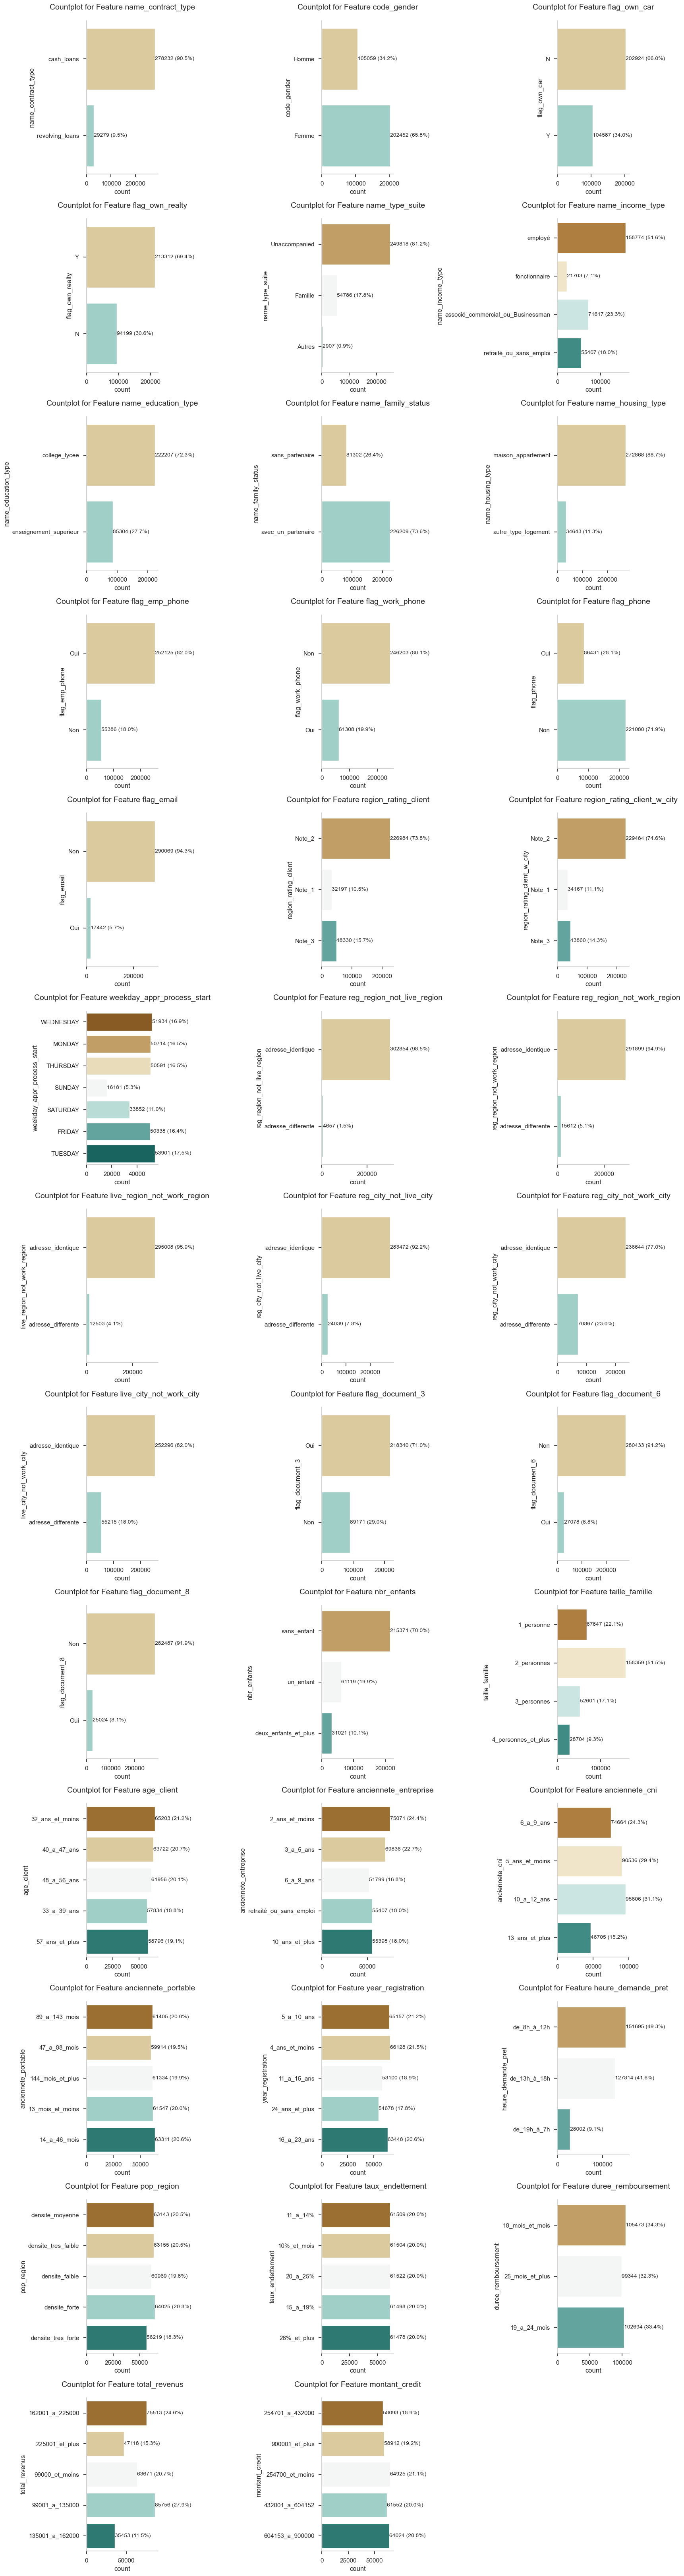

In [18]:
sns.set(style="ticks")

plot_multiple_countplots(df=X_train.select_dtypes(include='object'),
                         n_cols=3,
                         col_list=liste,
                         orient='h',
                         palette="BrBG",
                         size_labels=10,
                         size_title=14)
plt.tight_layout()
plt.show()

<div class="alert alert-info">Avant toute chose, récupérons les variables qui sont en lien avec la cible</div>    

<h2><font color="4DB033">Sélection des variables catégorielles dépendantes<a class="anchor" id="section_2_2_1"></a>

<div class="alert alert-info">Lorsque deux variables catégorielles doivent être testées pour déterminer s'il existe une relation, on utilise le test du khi-deux.<br> Les variables X et Y  sont dites indépendantes lorsqu'il n'existe aucun lien statistique entre elles.<br>
<font color="red">Le Test du χ2 d'indépendance</font> est un test d'hypothèse utilisé pour déterminer s'il existe une relation entre deux variables catégorielles.<br>
La connaissance de X ne permet en aucune manière de se prononcer sur Y. <br>
L'hypothèse nulle (H0) de ce test est la suivante : les deux variables X et Y sont indépendantes.<br>
En termes de p_value, l'hypothèse nulle est généralement rejetée lorsque p ≤ 0,05.<br></div> 

In [19]:
from scipy.stats import chi2_contingency

y = X_train['target']

chi_ls = []

for feature in X_train.select_dtypes(include='object'):
    
    # create contingency table
    c = pd.crosstab(y, X_train[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

                             p_value
age_client                     0.000
anciennete_entreprise          0.000
name_income_type               0.000
region_rating_client_w_city    0.000
region_rating_client           0.000
anciennete_portable            0.000
code_gender                    0.000
name_education_type            0.000
reg_city_not_work_city         0.000
montant_credit                 0.000
anciennete_cni                 0.000
flag_emp_phone                 0.000
reg_city_not_live_city         0.000
flag_document_3                0.000
pop_region                     0.000
year_registration              0.000
duree_remboursement            0.000
live_city_not_work_city        0.000
name_contract_type             0.000
flag_document_6                0.000
name_housing_type              0.000
flag_work_phone                0.000
total_revenus                  0.000
flag_phone                     0.000
flag_own_car                   0.000
nbr_enfants                    0.000
h

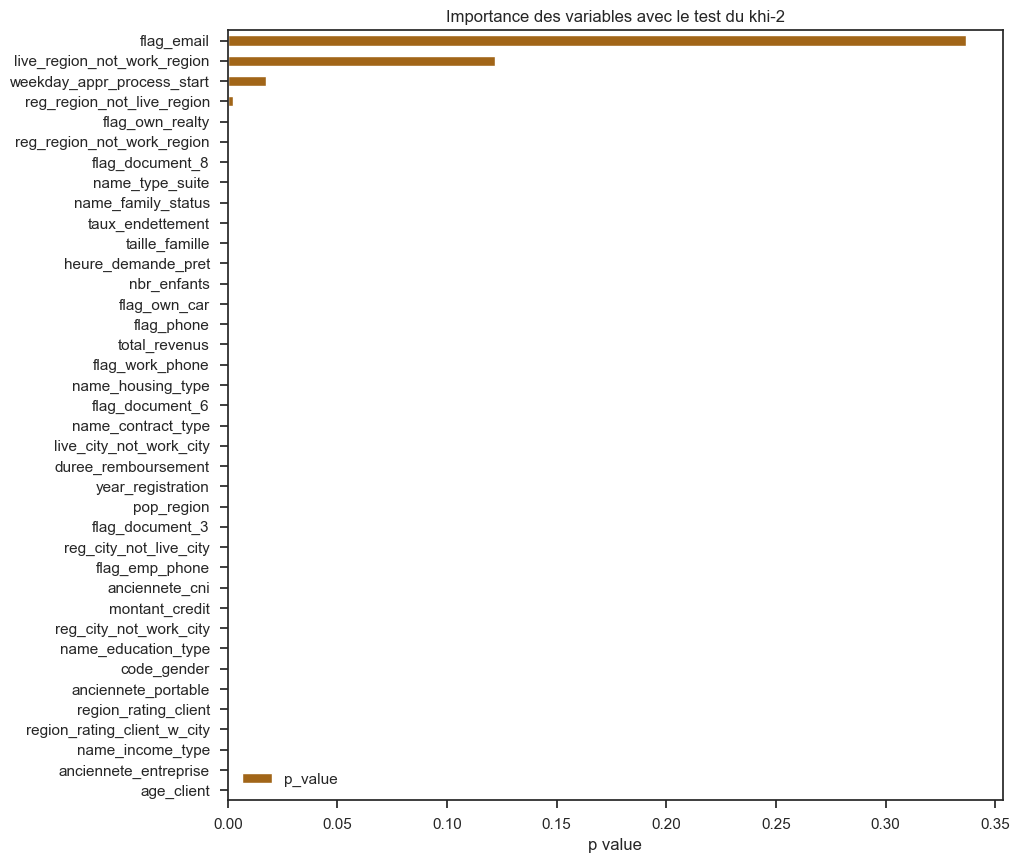

In [20]:
sns.set(style="ticks", rc={'figure.figsize': (10, 10)}, palette="BrBG")

df_pvalue = pd.DataFrame(chi_ls, index=X_train.select_dtypes(include='object').columns, columns=['p_value']).sort_values(by='p_value', ascending=True)

pd.set_option('display.float_format', '{:,.3f}'.format)
print(df_pvalue)

df_pvalue.plot.barh()
plt.xlabel('p value')
plt.title('Importance des variables avec le test du khi-2')
plt.show()


<div class="alert alert-success">Les p_value de <font color="red">(FLAG_EMAIL),(LIVE_REGION_NOT_WORK_REGION) et (WEEKDAY_APPR_PROCESS_START)</font> sont<font color="red"> >0.05.</font> Cela signifie 
que H0 est acceptée. En d'autres termes, ces variables sont dépendantes de la cible. On les supprime</div>    


In [21]:
var_to_drop = ['flag_email', 'live_region_not_work_region', 'weekday_appr_process_start']

X_train.drop(labels=var_to_drop, axis=1, inplace=True)

X_test.drop(labels=var_to_drop, axis=1, inplace=True)

In [22]:
y = X_train['target']

X_train.drop(labels='target', axis=1, inplace=True)

In [23]:
X_train.shape, X_test.shape, y.shape

((307511, 59), (48744, 59), (307511,))

In [24]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: target, Length: 307511, dtype: int64

<h2><font color="4DB033">Quantification des variables catégorielles<a class="anchor" id="section_2_2_2"></a>

<div class="alert alert-info">Il faut distinguer <font color="red">les variables catégorielles ordinales et les variables catégorielles nominales.</font><br><br>
<font color="red">Les variables catégorielles ordinales</font> ont des valeurs qui suivent un ordre naturel.
Elles peuvent être remplacées par une valeur chiffrée.<br><br>
<font color="red">Les variables catégorielles nominales</font> ont des valeurs qui ne suivent pas l'ordre naturel.<br>
La technique de quantification est la "dummification".<br>
La variable initiale est alors remplacée par un ensemble de nouvelles variables dites fictives (ou indicatrices) prenant les valeurs 0 ou 1 pour indiquer l'absence ou la présence de la modalité.<br></div>  

### Les variables catégorielles ordinales<a class="anchor" id="section_2_2_2_1"></a>

In [25]:
var_cat_ordinale = ['region_rating_client', 'region_rating_client_w_city', 'nbr_enfants', 'taille_famille', 'age_client', 
                    'anciennete_entreprise', 'anciennete_cni', 'anciennete_portable', 'year_registration', 'heure_demande_pret', 
                    'pop_region', 'taux_endettement', 'duree_remboursement', 'total_revenus', 'montant_credit']

X_train[var_cat_ordinale] = X_train[var_cat_ordinale].astype('category')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                                              Non-Null Count   Dtype   
---  ------                                              --------------   -----   
 0   sk_id_curr                                          307511 non-null  int64   
 1   name_contract_type                                  307511 non-null  object  
 2   code_gender                                         307511 non-null  object  
 3   flag_own_car                                        307511 non-null  object  
 4   flag_own_realty                                     307511 non-null  object  
 5   name_type_suite                                     307511 non-null  object  
 6   name_income_type                                    307501 non-null  object  
 7   name_education_type                                 307511 non-null  object  
 8   name_family_status                                  30

In [26]:
X_train[var_cat_ordinale]

,region_rating_client,region_rating_client_w_city,nbr_enfants,taille_famille,age_client,anciennete_entreprise,anciennete_cni,anciennete_portable,year_registration,heure_demande_pret,pop_region,taux_endettement,duree_remboursement,total_revenus,montant_credit
0,Note_2,Note_2,sans_enfant,1_personne,32_ans_et_moins,2_ans_et_moins,6_a_9_ans,89_a_143_mois,5_a_10_ans,de_8h_à_12h,densite_moyenne,11_a_14%,18_mois_et_mois,162001_a_225000,254701_a_432000
1,Note_1,Note_1,sans_enfant,2_personnes,40_a_47_ans,3_a_5_ans,5_ans_et_moins,47_a_88_mois,4_ans_et_moins,de_8h_à_12h,densite_tres_faible,11_a_14%,25_mois_et_plus,225001_et_plus,900001_et_plus
2,Note_2,Note_2,sans_enfant,1_personne,48_a_56_ans,2_ans_et_moins,6_a_9_ans,47_a_88_mois,11_a_15_ans,de_8h_à_12h,densite_faible,10%_et_mois,19_a_24_mois,99000_et_moins,254700_et_moins
3,Note_2,Note_2,sans_enfant,2_personnes,48_a_56_ans,6_a_9_ans,6_a_9_ans,47_a_88_mois,24_ans_et_plus,de_13h_à_18h,densite_tres_faible,20_a_25%,18_mois_et_mois,99001_a_135000,254701_a_432000
4,Note_2,Note_2,sans_enfant,1_personne,48_a_56_ans,6_a_9_ans,6_a_9_ans,89_a_143_mois,11_a_15_ans,de_8h_à_12h,densite_forte,15_a_19%,19_a_24_mois,99001_a_135000,432001_a_604152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Note_1,Note_1,sans_enfant,1_personne,32_ans_et_moins,2_ans_et_moins,5_ans_et_moins,14_a_46_mois,16_a_23_ans,de_13h_à_18h,densite_tres_forte,15_a_19%,18_mois_et_mois,135001_a_162000,254700_et_moins
307507,Note_2,Note_2,sans_enfant,1_personne,57_ans_et_plus,retraité_ou_sans_emploi,10_a_12_ans,13_mois_et_moins,11_a_15_ans,de_8h_à_12h,densite_forte,15_a_19%,19_a_24_mois,99000_et_moins,254701_a_432000
307508,Note_3,Note_3,sans_enfant,1_personne,40_a_47_ans,10_ans_et_plus,13_ans_et_plus,144_mois_et_plus,16_a_23_ans,de_8h_à_12h,densite_tres_faible,20_a_25%,19_a_24_mois,135001_a_162000,604153_a_900000
307509,Note_2,Note_2,sans_enfant,2_personnes,33_a_39_ans,10_ans_et_plus,5_ans_et_moins,14_a_46_mois,5_a_10_ans,de_8h_à_12h,densite_tres_faible,11_a_14%,18_mois_et_mois,162001_a_225000,254701_a_432000


In [27]:
# vérification : les modalités sont-elles reconnues comme ordonnées ?


# for s in var_cat_ordinale:
#     X_train[s] = X_train[s].cat.as_ordered()
#     print(s)
#     print(X_train[s], end="\n\n\n")

 
<div class="alert alert-success">Les modalités de certaines variables sont bien reconnues dans l'ordre. Nous pouvons donc les transformer en numérique directement.</div>  

In [28]:
cat_ordinale = ['region_rating_client', 'region_rating_client_w_city',
                'taille_famille', 'age_client', 'taux_endettement', 
                'duree_remboursement', 'montant_credit']
for s in cat_ordinale:
    X_train[s] = X_train[s].cat.codes

In [29]:
X_train[cat_ordinale]

,region_rating_client,region_rating_client_w_city,taille_famille,age_client,taux_endettement,duree_remboursement,montant_credit
0,1,1,0,0,1,0,1
1,0,0,1,2,1,2,4
2,1,1,0,3,0,1,0
3,1,1,1,3,3,0,1
4,1,1,0,3,2,1,2
...,...,...,...,...,...,...,...
307506,0,0,0,0,2,0,0
307507,1,1,0,4,2,1,1
307508,2,2,0,2,3,1,3
307509,1,1,1,1,1,0,1


***Pour l'ensemble de test***:

In [30]:
var_cat_ordinale = ['region_rating_client', 'region_rating_client_w_city', 'nbr_enfants', 'taille_famille', 'age_client', 
                    'anciennete_entreprise', 'anciennete_cni', 'anciennete_portable', 'year_registration', 'heure_demande_pret', 
                    'pop_region', 'taux_endettement', 'duree_remboursement', 'total_revenus', 'montant_credit']

X_test[var_cat_ordinale] = X_test[var_cat_ordinale].astype('category')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 59 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   sk_id_curr                                          48744 non-null  int64   
 1   name_contract_type                                  48744 non-null  object  
 2   code_gender                                         48744 non-null  object  
 3   flag_own_car                                        48744 non-null  object  
 4   flag_own_realty                                     48744 non-null  object  
 5   name_type_suite                                     48744 non-null  object  
 6   name_income_type                                    48743 non-null  object  
 7   name_education_type                                 48744 non-null  object  
 8   name_family_status                                  48744 non-null

In [31]:
# vérification : les modalités sont-elles reconnues comme ordonnées ?

# for s in var_cat_ordinale:
#     X_test[s] = X_test[s].cat.as_ordered()
#     print(s)
#     print(X_test[s], end="\n\n\n")

In [32]:
cat_ordinale = ['region_rating_client', 'region_rating_client_w_city',
                'taille_famille', 'age_client', 'taux_endettement', 
                'duree_remboursement', 'montant_credit']
for s in cat_ordinale:
    X_test[s] = X_test[s].cat.codes

<div class="alert alert-info">
<b>Transformation numérique des variables catégorielles ordinales dont l'ordre n'est pas reconnu : </b><br>
'nbr_enfants', 'anciennete_entreprise', 'anciennete_cni', 'anciennete_portable', <br>
'year_registration', 'heure_demande_pret', 'pop_region', 'total_revenus'
</div>

In [33]:
enf_map = {'sans_enfant': 0,
           'un_enfant': 1,
           'deux_enfants_et_plus': 2}

X_train['nbr_enfants'] = X_train['nbr_enfants'].map(enf_map)
X_test['nbr_enfants'] = X_test['nbr_enfants'].map(enf_map)

In [34]:
anc_ent = {'retraité_ou_sans_emploi': 0,
           '2_ans_et_moins': 1,
           '3_a_5_ans': 2,
           '6_a_9_ans': 3,
           '10_ans_et_plus': 4
           }

X_train['anciennete_entreprise'] = X_train['anciennete_entreprise'].map(anc_ent)
X_test['anciennete_entreprise'] = X_test['anciennete_entreprise'].map(anc_ent)

In [35]:
anc_cni = {'5_ans_et_moins': 0,
           '6_a_9_ans': 1,
           '10_a_12_ans': 2,
           '13_ans_et_plus': 3
           }

X_train['anciennete_cni'] = X_train['anciennete_cni'].map(anc_cni)
X_test['anciennete_cni'] = X_test['anciennete_cni'].map(anc_cni)

In [36]:
anc_gsm = {'13_mois_et_moins': 0,
           '14_a_46_mois': 1,
           '47_a_88_mois': 2,
           '89_a_143_mois': 3,
           '144_mois_et_plus': 4
           }

X_train['anciennete_portable'] = X_train['anciennete_portable'].map(anc_gsm)
X_test['anciennete_portable'] = X_test['anciennete_portable'].map(anc_gsm)

In [37]:
anc_registration = {'4_ans_et_moins': 0,
                    '5_a_10_ans': 1,
                    '11_a_15_ans': 2,
                    '16_a_23_ans': 3,
                    '24_ans_et_plus': 4
                    }

X_train['year_registration'] = X_train['year_registration'].map(anc_registration)
X_test['year_registration'] = X_test['year_registration'].map(anc_registration)

In [38]:
heure_map = {'de_8h_à_12h': 0,
             'de_13h_à_18h': 1,
             'de_19h_à_7h': 2}

X_train['heure_demande_pret'] = X_train['heure_demande_pret'].map(heure_map)
X_test['heure_demande_pret'] = X_test['heure_demande_pret'].map(heure_map)

In [39]:
pop_reg = {'densite_tres_faible': 0,
           'densite_faible': 1,
           'densite_moyenne': 2,
           'densite_forte': 3,
           'densite_tres_forte': 4
           }

X_train['pop_region'] = X_train['pop_region'].map(pop_reg)
X_test['pop_region'] = X_test['pop_region'].map(pop_reg)

In [40]:
tot_rev = {'99000_et_moins': 0,
           '99001_a_135000': 1,
           '135001_a_162000': 2,
           '162001_a_225000': 3,
           '225001_et_plus': 4
           }

X_train['total_revenus'] = X_train['total_revenus'].map(tot_rev)
X_test['total_revenus'] = X_test['total_revenus'].map(tot_rev)

In [41]:
for i in var_cat_ordinale:
    cat_analyzer(X_train, i)

region_rating_client
    COUNT  RATIO
1  226984 73.813
2   48330 15.717
0   32197 10.470


region_rating_client_w_city
    COUNT  RATIO
1  229484 74.626
2   43860 14.263
0   34167 11.111


nbr_enfants
    COUNT  RATIO
0  215371 70.037
1   61119 19.875
2   31021 10.088


taille_famille
    COUNT  RATIO
1  158359 51.497
0   67847 22.063
2   52601 17.105
3   28704  9.334


age_client
   COUNT  RATIO
0  65203 21.203
2  63722 20.722
3  61956 20.148
4  58796 19.120
1  57834 18.807


anciennete_entreprise
   COUNT  RATIO
1  75071 24.412
2  69836 22.710
0  55407 18.018
4  55398 18.015
3  51799 16.845


anciennete_cni
   COUNT  RATIO
2  95606 31.090
0  90536 29.442
1  74664 24.280
3  46705 15.188


anciennete_portable
   COUNT  RATIO
1  63311 20.588
0  61547 20.015
3  61405 19.968
4  61334 19.945
2  59914 19.484


year_registration
   COUNT  RATIO
0  66128 21.504
1  65157 21.189
3  63448 20.633
2  58100 18.894
4  54678 17.781


heure_demande_pret
    COUNT  RATIO
0  151695 49.330
1  127814 41.5

In [42]:
var_cat = X_train.select_dtypes(include='category').columns.to_list()

X_train[var_cat] = X_train[var_cat].astype('int8')

In [43]:
var_cat = X_test.select_dtypes(include='category').columns.to_list()

X_test[var_cat] = X_test[var_cat].astype('int8')

In [44]:
X_train

,sk_id_curr,name_contract_type,code_gender,flag_own_car,flag_own_realty,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,...,days_before_due,days_credit,amt_credit_sum,bureau_credit_actif_closed,bureau_credit_actif_sold_bad_debt,bureau_credit_type_credit_card,bureau_credit_type_other_credit,solde_credit_bureau_statut_actif_avec_jours_retard,solde_credit_bureau_statut_closed,cnt_instalment
0,100002,cash_loans,Homme,N,Y,Unaccompanied,employé,college_lycee,sans_partenaire,maison_appartement,...,0.000,2.375,"865,055.565",6.000,0.000,4.000,0.000,27.000,23.000,24.000
1,100003,cash_loans,Femme,N,N,Famille,fonctionnaire,enseignement_superieur,avec_un_partenaire,maison_appartement,...,0.000,3.750,"1,017,400.500",3.000,0.000,2.000,0.000,0.000,0.000,10.107
2,100004,revolving_loans,Homme,Y,Y,Unaccompanied,employé,college_lycee,sans_partenaire,maison_appartement,...,0.000,2.500,"189,037.800",2.000,0.000,0.000,0.000,0.000,0.000,3.750
3,100006,cash_loans,Femme,N,Y,Unaccompanied,employé,college_lycee,avec_un_partenaire,maison_appartement,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000
4,100007,cash_loans,Homme,N,Y,Unaccompanied,employé,college_lycee,sans_partenaire,maison_appartement,...,0.000,3.000,"146,250.000",1.000,0.000,0.000,0.000,0.000,0.000,15.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,cash_loans,Homme,N,N,Unaccompanied,employé,college_lycee,sans_partenaire,autre_type_logement,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.875
307507,456252,cash_loans,Femme,N,Y,Unaccompanied,retraité_ou_sans_emploi,college_lycee,sans_partenaire,maison_appartement,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000
307508,456253,cash_loans,Femme,N,Y,Unaccompanied,employé,enseignement_superieur,sans_partenaire,maison_appartement,...,0.000,2.750,"3,960,000.000",2.000,0.000,1.000,0.000,0.000,57.000,6.706
307509,456254,cash_loans,Femme,N,Y,Unaccompanied,associé_commercial_ou_Businessman,college_lycee,avec_un_partenaire,maison_appartement,...,0.000,3.000,"45,000.000",1.000,0.000,0.000,0.000,0.000,29.000,14.900


###  Les variables catégorielles nominales<a class="anchor" id="section_2_2_2_2"></a>

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   sk_id_curr                                          307511 non-null  int64  
 1   name_contract_type                                  307511 non-null  object 
 2   code_gender                                         307511 non-null  object 
 3   flag_own_car                                        307511 non-null  object 
 4   flag_own_realty                                     307511 non-null  object 
 5   name_type_suite                                     307511 non-null  object 
 6   name_income_type                                    307501 non-null  object 
 7   name_education_type                                 307511 non-null  object 
 8   name_family_status                                  307511 non-n

In [46]:
var_cat_nominale = X_train.select_dtypes(include='object').columns.to_list()
print(var_cat_nominale)

['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty', 'name_type_suite', 'name_income_type', 'name_education_type', 'name_family_status', 'name_housing_type', 'flag_emp_phone', 'flag_work_phone', 'flag_phone', 'reg_region_not_live_region', 'reg_region_not_work_region', 'reg_city_not_live_city', 'reg_city_not_work_city', 'live_city_not_work_city', 'flag_document_3', 'flag_document_6', 'flag_document_8']


In [47]:
X_train.shape

(307511, 59)

In [48]:
X_train = pd.get_dummies(X_train,
                         columns=var_cat_nominale,
                         drop_first=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 62 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   sk_id_curr                                          307511 non-null  int64  
 1   region_rating_client                                307511 non-null  int8   
 2   region_rating_client_w_city                         307511 non-null  int8   
 3   ext_source_2                                        307511 non-null  float64
 4   nbr_enfants                                         307511 non-null  int8   
 5   taille_famille                                      307511 non-null  int8   
 6   age_client                                          307511 non-null  int8   
 7   anciennete_entreprise                               307511 non-null  int8   
 8   anciennete_cni                                      307511 non-n

In [49]:
X_train

,sk_id_curr,region_rating_client,region_rating_client_w_city,ext_source_2,nbr_enfants,taille_famille,age_client,anciennete_entreprise,anciennete_cni,anciennete_portable,...,flag_work_phone_Oui,flag_phone_Oui,reg_region_not_live_region_adresse_identique,reg_region_not_work_region_adresse_identique,reg_city_not_live_city_adresse_identique,reg_city_not_work_city_adresse_identique,live_city_not_work_city_adresse_identique,flag_document_3_Oui,flag_document_6_Oui,flag_document_8_Oui
0,100002,1,1,0.263,0,0,0,1,1,3,...,0,1,1,1,1,1,1,1,0,0
1,100003,0,0,0.622,0,1,2,2,0,2,...,0,1,1,1,1,1,1,1,0,0
2,100004,1,1,0.556,0,0,3,1,1,2,...,1,1,1,1,1,1,1,0,0,0
3,100006,1,1,0.650,0,1,3,3,1,2,...,0,0,1,1,1,1,1,1,0,0
4,100007,1,1,0.323,0,0,3,3,1,3,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,0.682,0,0,0,1,0,1,...,0,0,1,1,1,1,1,0,0,1
307507,456252,1,1,0.116,0,0,4,0,2,0,...,0,1,1,1,1,1,1,1,0,0
307508,456253,2,2,0.536,0,0,2,4,3,4,...,0,0,1,1,1,0,0,1,0,0
307509,456254,1,1,0.514,0,1,1,4,0,1,...,0,0,1,1,0,0,1,1,0,0


In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 59 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   sk_id_curr                                          48744 non-null  int64  
 1   name_contract_type                                  48744 non-null  object 
 2   code_gender                                         48744 non-null  object 
 3   flag_own_car                                        48744 non-null  object 
 4   flag_own_realty                                     48744 non-null  object 
 5   name_type_suite                                     48744 non-null  object 
 6   name_income_type                                    48743 non-null  object 
 7   name_education_type                                 48744 non-null  object 
 8   name_family_status                                  48744 non-null  object 


In [51]:
var_cat_nominale = X_test.select_dtypes(include='object').columns.to_list()
print(var_cat_nominale)

['name_contract_type', 'code_gender', 'flag_own_car', 'flag_own_realty', 'name_type_suite', 'name_income_type', 'name_education_type', 'name_family_status', 'name_housing_type', 'flag_emp_phone', 'flag_work_phone', 'flag_phone', 'reg_region_not_live_region', 'reg_region_not_work_region', 'reg_city_not_live_city', 'reg_city_not_work_city', 'live_city_not_work_city', 'flag_document_3', 'flag_document_6', 'flag_document_8']


In [52]:
X_test = pd.get_dummies(X_test,
                        columns=var_cat_nominale,
                        drop_first=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 62 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   sk_id_curr                                          48744 non-null  int64  
 1   region_rating_client                                48744 non-null  int8   
 2   region_rating_client_w_city                         48744 non-null  int8   
 3   ext_source_2                                        48744 non-null  float64
 4   nbr_enfants                                         48744 non-null  int8   
 5   taille_famille                                      48744 non-null  int8   
 6   age_client                                          48744 non-null  int8   
 7   anciennete_entreprise                               48744 non-null  int8   
 8   anciennete_cni                                      48744 non-null  int8   


In [53]:
X_train = X_train.rename(columns={'name_income_type_employé':'name_income_type_employed'})
X_test = X_test.rename(columns={'name_income_type_employé':'name_income_type_employed'})


In [54]:
X_train = X_train.rename(columns={'name_income_type_retraité_ou_sans_emploi':'name_income_type_retraited_ou_sans_emploi'})
X_test = X_test.rename(columns={'name_income_type_retraité_ou_sans_emploi':'name_income_type_retraited_ou_sans_emploi'})

<h1><font color="purple">Traitement des variables continues<a class="anchor" id="section_2_3"></a>

<div class="alert alert-info">
 Nous allons faire une mise à l'échelle des variables continues avec <font color="red">RobustScaler</font> 
</div>

<!-- <div class="alert alert-info">
<font color="red">La normalisation</font> facilite l’apprentissage des modèles de Machine Learning qui sont basés sur la descente du gradient, les calculs de distance ou les calculs de variance.<br>
<font color="red">La normalisation</font> égalise le poids de chaque dimension dans le but d’éviter que les variables ayant de grandes valeurs  soient considérées plus importantes que les variables ayant des valeurs moins grandes.<br>
<font color="red">La normalisation</font> standardise la moyenne et l’écart-type de tout type de distribution de données, ce qui permet de simplifier le problème d’apprentissage en s’affranchissant de ces deux paramètres.<br>

</div> -->

In [55]:
# function to create histogram, Q-Q plot and boxplot.

# for Q-Q plots
# import scipy.stats as stats

# def diagnostic_plots(df, variable, title):
#     # function takes a dataframe (df) and
#     # the variable of interest as arguments

#     # define figure size
#     sns.set(style="ticks", rc = {'figure.figsize':(20, 4)})

#     # histogram
#     plt.subplot(1, 3, 1)
#     sns.histplot(df[variable], bins=30)
#     plt.title('Histogram')

#     # Q-Q plot
#     plt.subplot(1, 3, 2)
#     stats.probplot(df[variable], dist="norm", plot=plt)
#     plt.ylabel('Variable quantiles')

#     # boxplot
#     plt.subplot(1, 3, 3)
#     sns.boxplot(y=df[variable])
#     plt.title('Boxplot')
    
#     plt.suptitle(f"{title}",
#                  y=1.05, fontsize=20, fontstyle='italic')

#     plt.show()
    

In [56]:
# for i in X_train.select_dtypes(include='float').columns.to_list():
#     diagnostic_plots(X_train, i, "Histogramme et BoxPlot")

In [57]:
scaler_Rob = RobustScaler()

In [58]:

var_num_cont = X_train.select_dtypes(include='float').columns.to_list()
scaled_Rob_df = scaler_Rob.fit_transform(X_train[var_num_cont])
scaled_Rob_df = pd.DataFrame(scaled_Rob_df, columns=var_num_cont)
X_train[var_num_cont] = scaled_Rob_df

In [59]:
var_num_cont2 = X_test.select_dtypes(include='float').columns.to_list()
scaled_Rob_df2 = scaler_Rob.fit_transform(X_test[var_num_cont2])
scaled_Rob_df2 = pd.DataFrame(scaled_Rob_df2, columns=var_num_cont2)
X_test[var_num_cont2] = scaled_Rob_df2

In [60]:
2

2

<h1><font color="purple">Création des ensembles X_Xtrain et X_valid<a class="anchor" id="section_2_4"></a>

<div class="alert alert-info">
En apprentissage automatique, une tâche courante est l'étude et la construction d'algorithmes qui peuvent apprendre et faire des prédictions sur les données<br>
De tels algorithmes fonctionnent en faisant des prédictions ou des décisions basées sur les données,
en construisant un modèle mathématique à partir des données d'entrée.<br>
Ces données d'entrée utilisées pour construire le modèle sont généralement divisées en plusieurs jeux de données.<br> 
En particulier, trois jeux de données sont couramment utilisés à différentes étapes de la création du modèle :<font color="red"> les jeux d'apprentissage, de validation et de test.</font>
</div>

<div class="alert alert-info">
Le modèle est initialement ajusté sur un <font color="red">jeu de données d'apprentissage X_Xtrain </font>qui est un jeu d'exemples utilisés pour ajuster les paramètres (par exemple, les poids des connexions entre les neurones dans les réseaux de neurones artificiels ) du modèle.<br>
En pratique, <font color="red">le jeu de données d'apprentissage</font> se compose souvent de paires d'un vecteur d'entrée (ou scalaire) et du vecteur (ou scalaire) de sortie correspondant, où la variable de réponse est communément appelée<font color="red"> cible.</font><br>
Le modèle est exécuté avec le jeu de données d'apprentissage et produit un résultat, qui est ensuite comparé à la cible, pour chaque vecteur d'entrée dans le jeu de données d'apprentissage.<br>
Sur la base du résultat de la comparaison et de l'algorithme d'apprentissage spécifique utilisé, les paramètres du modèle sont ajustés.
</div>

<div class="alert alert-info">
Le modèle ajusté est utilisé pour prédire les réponses pour les observations dans un deuxième jeu de données appelé <font color="red">jeu de données de validation X_valid.</font> Le jeu de données de validation fournit une évaluation impartiale d'un ajustement de modèle sur le jeu de données d'apprentissage tout en ajustant les hyperparamètres 
</div>

<div class="alert alert-info">
Le <font color="red">jeu de données de test X_test</font> est un jeu de données utilisé pour fournir une évaluation impartiale d'un ajustement final du modèle sur le jeu de données d'apprentissage
</div>

<div class="alert alert-info">
Nous disposons déjà des données de Test (X_test).<br>

Nous allons maintenant diviser l'ensemble d'entrainement (X_train) en 2 sous ensembles de données : <font color="red">X_Xtrain (70%) </font>notre ensemble d'entraînement et <font color="red">X_valid (30%) </font>notre ensemble de validation.
</div>

In [61]:
X_train.drop(labels='sk_id_curr', axis=1, inplace=True)
X_test.drop(labels='sk_id_curr', axis=1, inplace=True)

X_test.shape, X_train.shape, y.shape

((48744, 61), (307511, 61), (307511,))

In [62]:
from sklearn.model_selection import train_test_split

X_Xtrain, X_valid, y_train, y_valid = train_test_split(X_train, y, stratify=y, test_size=0.3, random_state=101)

X_Xtrain.shape, y_train.shape, X_valid.shape, y_valid.shape

((215257, 61), (215257,), (92254, 61), (92254,))

In [63]:
# print("y_train - TARGET")
# print(pd.DataFrame({
#     "COUNT": y_train.value_counts(),
#     "RATIO": y_train.value_counts() / len(y_train) * 100}))

In [64]:
# print("y_valid - TARGET")
# print(pd.DataFrame({
#     "COUNT": y_valid.value_counts(),
#     "RATIO": y_valid.value_counts() / len(y_valid) * 100}))

In [65]:
# Mise à l'échelle des données
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_Xtrain.drop(labels='sk_id_curr', axis=1))

# X_train_sd = scaler.transform(X_Xtrain.drop(labels='sk_id_curr', axis=1))
# X_valid_sd = scaler.transform(X_valid.drop(labels='sk_id_curr', axis=1))

In [66]:
# Mise à l'échelle des données
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_Xtrain)

# X_train_sd = scaler.transform(X_Xtrain)
# X_valid_sd = scaler.transform(X_valid)

In [67]:
# # vérification

# X_train_sd.mean(), X_train_sd.std()

In [68]:
# X_valid_sd.mean(), X_valid_sd.std()

In [69]:
# Transformation des matrices standardisées en dataframe pour avoir les noms des variables

# X_train_sd_df = pd.DataFrame(X_train_sd, columns=list(X_Xtrain))
# X_valid_sd_df = pd.DataFrame(X_valid_sd, columns=list(X_Xtrain))
# y_train_df = pd.DataFrame(y_train)
# y_valid_df = pd.DataFrame(y_valid)

In [70]:
# X_train_sd_df.shape, X_valid_sd_df.shape, y_train_df.shape, y_valid_df.shape

<h1> <p><font color="blue">Variable cible - Gestion du problème de classification déséquilibrée<a class="anchor" id="chapter3"></a>

<h1><font color="purple">Observations avant équilibrage de la cible<a class="anchor" id="section_3_1"></a>

<div class="alert alert-info">
<h2>Observons la cible à prédire.</h2>
</div> 

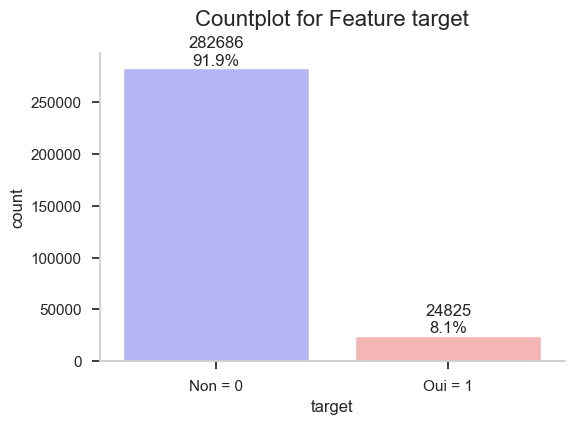

In [103]:
from xplotter.insights import *

#colors = ['#d4b3ac']

loan_map = {1 : "Oui = 1",
            0 : "Non = 0"}

fig, ax = plt.subplots(figsize=(6, 4))

plot_countplot(df=yy, 
               col='target', 
               label_names=loan_map,
               order=True,
               palette='bwr', ax=ax, orient='v', size_labels=12)

plt.show()

<div class="alert alert-success">
Nous constatons un fort déséquilibre entre la <font color="red">Target "0 -Non" (0.92)</font> et la <font color="red">Target "1 -Oui" (0.08)</font>.<br>
L'échantillon de travail <font color="red">n'est pas équilibré</font>, avec 92% des individus classés en modalité "0-Non" et 8% en modalité "1-Oui", à savoir en défaut de paiement de paiement.
</div> 

<div class="alert alert-info">
Dans les projets de Machine Learning, en général, les modèles fonctionnent correctement si les proportions des classes du jeu de données utilisé sont relativement similaires. Cependant, des déséquilibres s’invitent parfois dans l’équation.
</div> 

<div class="alert alert-info">
La notion de <font color="red">“déséquilibre de classe”</font> est très importante en machine learning, et en particulier pour les modèles de type “supervisés” qui impliquent deux classes (ou plus)
</div>

<div class="alert alert-info">
La classification sur données déséquilibrées est un problème de classification où l’échantillon d’apprentissage contient une forte disparité entre les classes à prédire. Ce problème revient fréquemment dans les problèmes de classification binaire
</div>

<div class="alert alert-info">
Le choix d’une métrique appropriée n’est pas évident pour tout modèle de Machine Learning, mais il est particulièrement difficile pour les problèmes de classification déséquilibrée.

Dans le cas de données comportant une classe fortement majoritaire, les algorithmes classiques sont souvent biaisés car leurs fonctions de perte tentent d’optimiser des métriques telles que le taux de bonnes prédictions, en ne tenant pas compte de la distribution des données.

Dans le pire des cas, les classes minoritaires sont traitées comme des valeurs aberrantes de la classe majoritaire et l’algorithme d’apprentissage génère simplement un classifieur trivial qui classe chaque exemple dans la classe majoritaire. Le modèle semblera performant mais cela ne sera que le reflet de la surreprésentation de la classe majoritaire. On parle d’accuracy paradoxe.

Dans la majorité des cas, c’est justement la classe minoritaire qui présente le plus fort intérêt et que l’on aimerait pouvoir identifier, comme dans l’exemple de la détection de fraudes.

Le degré de déséquilibre varie mais les cas d’usages sont fréquents: dépistage de maladies, détection de panne, moteur de recherche, filtrage de spams, ciblage marketing etc…
</div>

<div class="alert alert-info">
<b>Il est donc intéressant de travailler cet Oversampling  en ajustant la distribution de classe de manière à avoir une répartition plus égalitaire.<br>

<div>

<div class="alert alert-warning">
<b> <font color="red">Quelle méthode choisir pour pallier le déséquilibre des classes?</font> 
</div> 

<div class="alert alert-info">
<b>
<font color="red"> Voyons les différentes méthodes pour pallier le déséquilibre des classes</font>
<div>

<div class = "alert alert-info alert-info">
<ul>
<li>Le sous-échantillonnage aléatoire (random <font color="red">undersampling</font>) des observations majoritaires. Les méthodes d’Undersampling fonctionnent en diminuant le nombre d’observations de la  (des) classe(s) majoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.</li><br>
<li>Le sur-échantillonnage aléatoire (random <font color="red">oversampling</font>) des observations minoritaires.Les méthodes d’Oversampling fonctionnent en augmentant le nombre d’observations de la (des) classe(s) minoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.</li><br>
<li>Le sur-échantillonnage synthétique (<font color="red">SMOTE pour Synthetic Minority Oversampling Technique </font>) produit des observations minoritaires ressemblantes mais distinctes de celles déjà existantes.</li><br>
</ul>
L'idée est de combiner SMOTE avec une technique de sous-échantillonnage <font color="red">(ENN, Tomek)</font> pour augmenter l'efficacité de la gestion de la classe déséquilibrée.

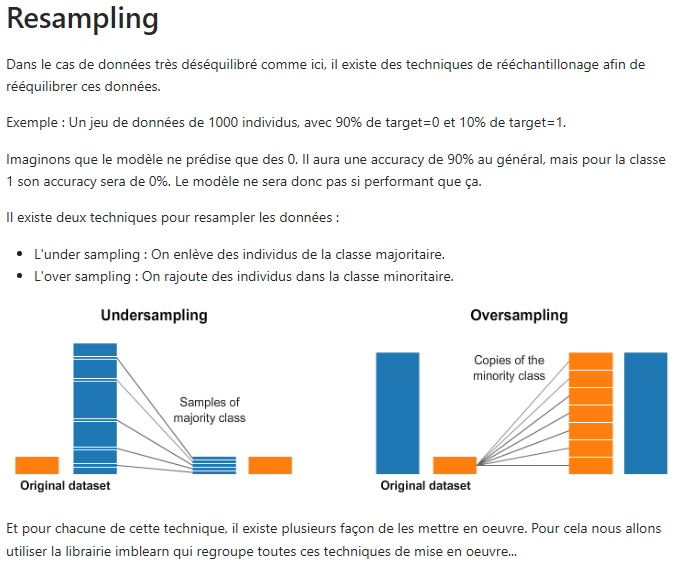

In [72]:
from IPython.display import Image
Image(filename='Resampling.PNG')

<div class="alert alert-warning">
<b> <font color="red">Quelle métrique choisir pour notre problème de déséquilibre?</font> 
</div> 

<div class = "alert alert-info alert-info">
Les métriques connues sont : <br>
<ul>
<li> <font color="red"> Accuracy. </font> L’accuracy est le premier indicateur dérivé de la matrice de confusion. Il consiste à regarder quelle proportion des prédictions est juste : (VP + VN) / Total </li>
<li> <font color="red"> Recall. </font> Le rappel est la proportion de la classe positive détectée (compris entre 0 et 1). Sa formule est : VP / (VP + FN) </li>
<li> <font color="red"> Precision. </font> La précision est, elle, la proportion des vrais positifs dans l’ensemble des positifs détectés (aussi comprise entre 0 et 1). Sa formule est : VP / (VP + FP) </li>
<li> <font color="red"> F1-Score. </font> Sa définition est la moyenne harmonique de la précision et du rappel. En pratique cela donne la formule suivante : 2 * (precision * recall) / (precision + recall) </li>
<li> <font color="red"> Roc-Auc. </font> La courbe ROC (Receiver Operating Charasteristic) et l’AUC (Area Under Curve, soit l’aire sous la courbe) sont deux indicateurs permettant d’analyser un modèle et en particulier son seuil de détection. </li>
</ul>


In [73]:
# %%time
# lr = LogisticRegression(C = 0.0001, max_iter=100)
# lr.fit(X_train, y_train)

# roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

# print('AUC : %0.4f' %roc_auc)
# print(classification_report(y_test, lr.predict(X_test)))

In [74]:
X_train_sd_df = X_Xtrain
X_valid_sd_df = X_valid
y_train_df = y_train
y_valid_df = y_valid


In [75]:
%%time
lr = LogisticRegression(max_iter=100 , C = 0.0001)
lr.fit(X_train_sd_df, y_train)

CPU times: total: 10.1 s
Wall time: 1.93 s


LogisticRegression(C=0.0001)

In [76]:
# prediction des probabilities et conservation uniquement des probabilités pour le résultat positif
y_train_lr = lr.predict_proba(X_train_sd_df)[:,1]
y_valid_lr = lr.predict_proba(X_valid_sd_df)[:,1]

<h3><font color="purple">------------------ Visualisation de la "precision", du "recall" et du "f1-score" ---------------------------<a class="anchor" id="section_3_1_1"></a>

In [77]:

# roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_valid, y_valid_lr)

print('AUC : %0.4f' %roc_auc)

# print(classification_report(y_test, lr.predict(X_test)))
print(classification_report(y_valid_df, lr.predict(X_valid_sd_df)))

AUC : 0.7124
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.30      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.61      0.50      0.48     92254
weighted avg       0.87      0.92      0.88     92254



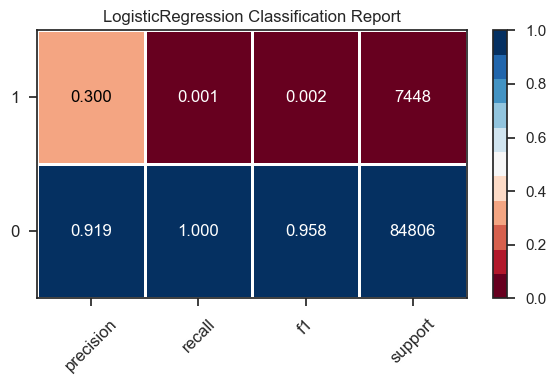

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [78]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ClassificationReport(lr, support=True, cmap='RdBu')

visualizer.fit(X_train_sd_df, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid_sd_df, y_valid)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

<h3><font color="purple">----------------------- Visualisation de  "AUC" et de "ROC" ----------------<a class="anchor" id="section_3_1_2"></a>

In [79]:
# cf_matrix_roc_auc(lr, y_test, lr.predict(X_test), lr.predict_proba(X_test)[:,1])

CPU times: total: 734 ms
Wall time: 163 ms


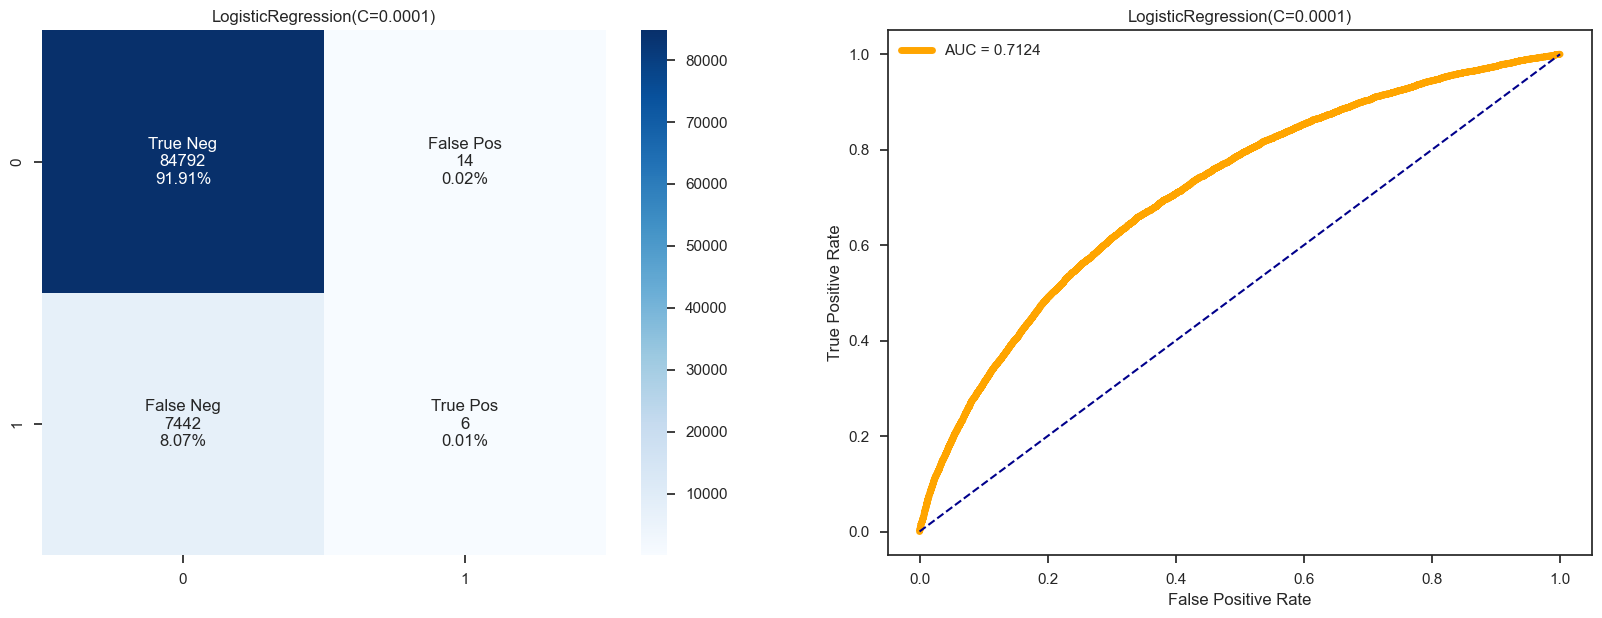

In [80]:
%%time
cf_matrix_roc_auc(lr, y_valid, lr.predict(X_valid_sd_df), lr.predict_proba(X_valid_sd_df)[:,1])

<h1><font color="purple">Équilibrage de la cible<a class="anchor" id="section_3_2"></a>

In [81]:
# définisson la stratégie SMOTE
sm = SMOTE(random_state=42)
# Définir les liens SMOTE-Tomek (sur-échantillonnage suivi d'un sous-échantillonnage)
smtomek=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# définir la stratégie de suréchantillonnage
oversample = RandomOverSampler(sampling_strategy='minority')
# définir la stratégie de sous-échantillonnage
undersample = RandomUnderSampler(sampling_strategy='majority')

In [82]:
X_train_sd_df

,region_rating_client,region_rating_client_w_city,ext_source_2,nbr_enfants,taille_famille,age_client,anciennete_entreprise,anciennete_cni,anciennete_portable,year_registration,...,flag_work_phone_Oui,flag_phone_Oui,reg_region_not_live_region_adresse_identique,reg_region_not_work_region_adresse_identique,reg_city_not_live_city_adresse_identique,reg_city_not_work_city_adresse_identique,live_city_not_work_city_adresse_identique,flag_document_3_Oui,flag_document_6_Oui,flag_document_8_Oui
173774,1,1,0.175,0,1,3,4,0,0,1,...,0,1,1,1,1,1,1,1,0,0
187238,0,0,0.433,0,1,4,2,3,0,0,...,0,1,1,1,1,1,1,1,0,0
251117,0,0,0.564,0,1,2,4,2,1,1,...,1,1,1,1,1,0,0,0,0,1
230832,1,1,-0.312,0,1,3,3,1,4,0,...,0,0,1,1,1,1,1,1,0,0
172140,2,2,-0.777,1,2,0,1,0,2,0,...,0,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224400,2,2,-1.925,0,0,2,2,0,2,2,...,0,1,1,1,1,1,1,1,0,0
129160,1,1,0.150,0,1,3,4,1,3,3,...,1,0,1,1,1,1,1,0,1,0
23715,1,1,-0.401,0,0,2,1,2,4,4,...,0,0,1,1,1,0,0,1,0,0
98261,1,1,-0.003,0,0,0,2,1,1,2,...,0,0,1,1,1,1,1,0,0,1


In [83]:
%%time
X_train_smtomek_sd,y_train_smtomek_sd = resampling (X_train_sd_df, y_train, smtomek)

Original dataset shape Counter({0: 197880, 1: 17377})
Resampled dataset shape Counter({1: 197880, 0: 197863})
CPU times: total: 23min 9s
Wall time: 2min 3s


In [84]:
%%time
X_valid_smtomek_sd,y_valid_smtomek_sd = resampling(X_valid_sd_df, y_valid, smtomek)

Original dataset shape Counter({0: 84806, 1: 7448})
Resampled dataset shape Counter({1: 84806, 0: 84787})
CPU times: total: 4min 26s
Wall time: 23.4 s


<h1><font color="purple">Observations après équilibrage de la cible<a class="anchor" id="section_3_3"></a>

In [85]:
%%time
lr = LogisticRegression(max_iter=100 , C = 0.0001)
lr.fit(X_train_smtomek_sd, y_train_smtomek_sd)

CPU times: total: 16.2 s
Wall time: 3.39 s


LogisticRegression(C=0.0001)

In [86]:
# prediction des probabilities et conservation uniquement des probabilités pour le résultat positif
y_train_smtomek_sd_lr = lr.predict_proba(X_train_smtomek_sd)[:,1]
y_valid_smtomek_sd_lr = lr.predict_proba(X_valid_smtomek_sd)[:,1]

<h3><font color="purple">------------ Visualisation de la "precision", du "recall" et du "f1-score" -----------------------<a class="anchor" id="section_3_3_1">   

In [87]:

# roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_valid_smtomek_sd, y_valid_smtomek_sd_lr)

print('AUC : %0.4f' %roc_auc)

# print(classification_report(y_test, lr.predict(X_test)))
print(classification_report(y_valid_smtomek_sd, lr.predict(X_valid_smtomek_sd)))

AUC : 0.8864
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     84787
           1       0.82      0.80      0.81     84806

    accuracy                           0.81    169593
   macro avg       0.81      0.81      0.81    169593
weighted avg       0.81      0.81      0.81    169593



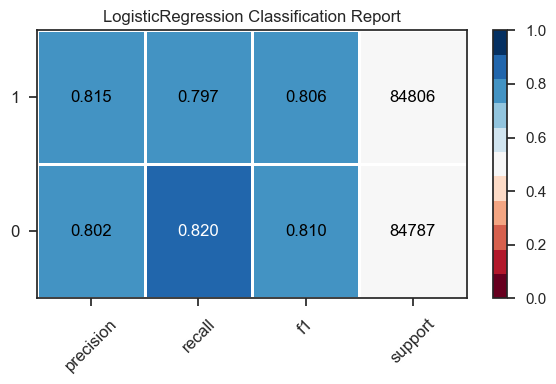

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [88]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ClassificationReport(lr, support=True, cmap='RdBu')

visualizer.fit(X_train_smtomek_sd, y_train_smtomek_sd)        # Fit the visualizer and the model
visualizer.score(X_valid_smtomek_sd, y_valid_smtomek_sd)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

<h3><font color="purple">-------------------------------------- Visualisation de  "AUC" et de "ROC" -------------------------------</font></h3><a class="anchor" id="section_3_3_2">

In [89]:
# cf_matrix_roc_auc(lr, y_test, lr.predict(X_test), lr.predict_proba(X_test)[:,1])

CPU times: total: 1.09 s
Wall time: 233 ms


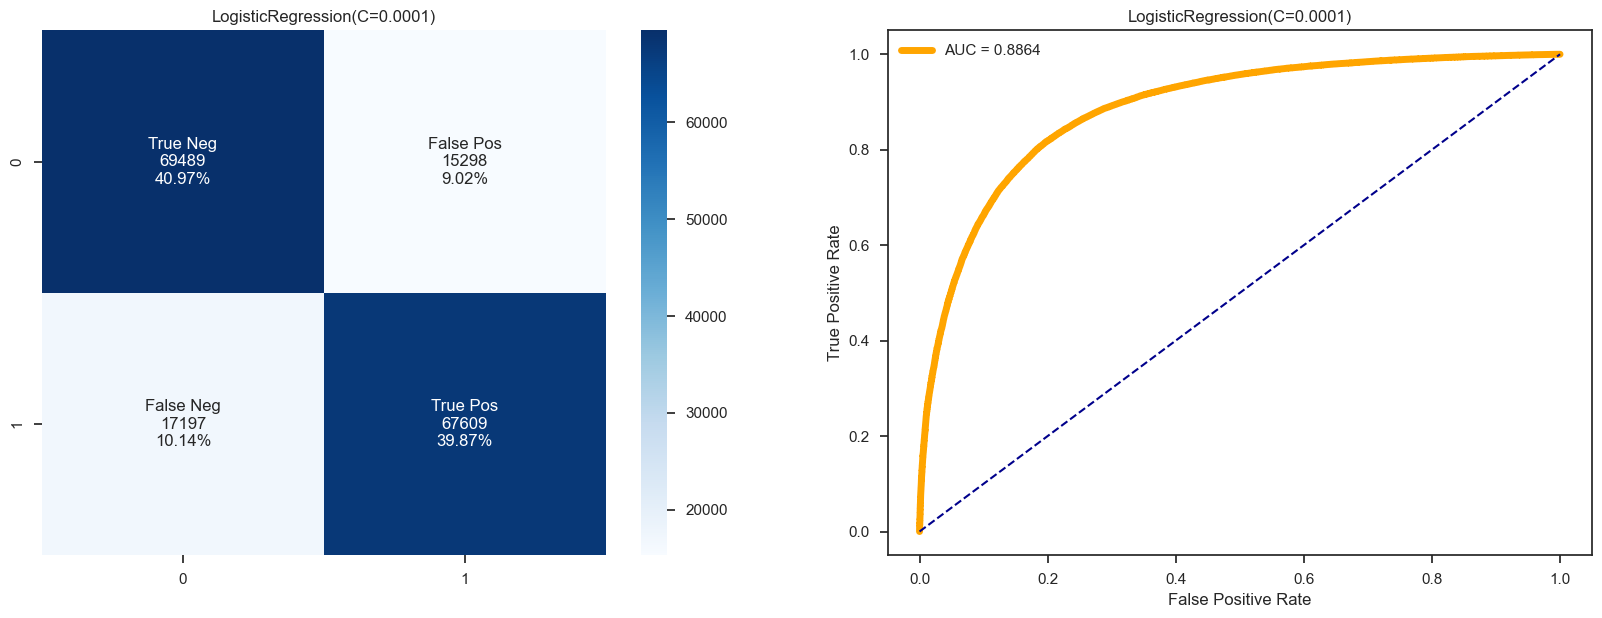

In [98]:
%%time
cf_matrix_roc_auc(lr, y_valid_smtomek_sd, lr.predict(X_valid_smtomek_sd), lr.predict_proba(X_valid_smtomek_sd)[:,1])

<div class="alert alert-success"><b>On remarque qu'il y a une <font color="red">amélioration dans les performances</font></div> 

<h1> <p><font color="blue">Enregistrement des datasets<a class="anchor" id="chapter4"></a>

In [92]:
# Enregistrons ces fichiers sur le répertoire de travail

#%%time
pd.DataFrame(X_train_smtomek_sd).to_csv('X_train_smtomek_sd.csv',index=False)
pd.DataFrame(y_train_smtomek_sd).to_csv('y_train_smtomek_sd.csv',index=False)
pd.DataFrame(X_valid_smtomek_sd).to_csv('X_valid_smtomek_sd.csv',index=False)
pd.DataFrame(y_valid_smtomek_sd).to_csv('y_valid_smtomek_sd.csv',index=False)

X_test.to_csv("X_test_feat.csv" , index=False)

In [93]:
CHEMIN = 'C:/Users/PERFECTO/PROJET_7_Streamlit/'

In [95]:
# Enregistrons ces fichiers sur le répertoire de travail avec Streamlit

#%%time
pd.DataFrame(X_train_smtomek_sd).to_csv(CHEMIN+'X_train_smtomek_sd.csv',index=False)
pd.DataFrame(y_train_smtomek_sd).to_csv(CHEMIN+'y_train_smtomek_sd.csv',index=False)
pd.DataFrame(X_valid_smtomek_sd).to_csv(CHEMIN+'X_valid_smtomek_sd.csv',index=False)
pd.DataFrame(y_valid_smtomek_sd).to_csv(CHEMIN+'y_valid_smtomek_sd.csv',index=False)

X_test.to_csv(CHEMIN+"X_test_feat.csv" , index=False)

In [96]:
%%time
X_train_1 = pd.read_csv('X_train_smtomek_sd.csv' )
y_train_1 = pd.read_csv('y_train_smtomek_sd.csv' )
X_valid_1 = pd.read_csv('X_valid_smtomek_sd.csv' )
y_valid_1 = pd.read_csv('y_valid_smtomek_sd.csv' )

X_test = pd.read_csv("X_test_feat.csv")

CPU times: total: 2.97 s
Wall time: 2.99 s


In [99]:
print('Taille de X_train_1  : ',X_train_1.shape)
print('Taille de y_train_1  : ',y_train_1.shape)
print('Taille de X_valid_1   : ',X_valid_1.shape)
print('Taille de y_valid_1   : ',y_valid_1.shape)

print('X_test   : ',X_test.shape)

Taille de X_train_1  :  (395743, 61)
Taille de y_train_1  :  (395743, 1)
Taille de X_valid_1   :  (169593, 61)
Taille de y_valid_1   :  (169593, 1)
X_test   :  (48744, 61)
